In [1]:
# Head to the main JIND directory
%cd ../
# Make sure JIND is installed
!pip install -e .

/srv/data/mohit/seq-rna/JIND
Obtaining file:///srv/data/mohit/seq-rna/JIND


  Attempting uninstall: jind
    Found existing installation: jind 0.1
    Uninstalling jind-0.1:
      Successfully uninstalled jind-0.1
  Running setup.py develop for jind
You should consider upgrading via the '/srv/data/mohit/torch-cpu/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import sys, os, pdb
import pandas as pd
import argparse
import torch
from jind import JindLib
from matplotlib import pyplot as plt
import argparse
from datetime import datetime

In [3]:
# Path to source batch
train_path = "data/train.pkl"
# Path to target batch
test_path = "data/test.pkl"
# Column containing cell-types
lname = "labels" 

train_batch = pd.read_pickle(train_path)
test_batch = pd.read_pickle(test_path)

In [4]:
train_mat = train_batch.drop(lname, axis=1)
train_labels = train_batch[lname]

test_mat = test_batch.drop(lname, axis=1)
test_labels = test_batch[lname]

path = os.path.dirname(train_path) + "/JIND"

obj = JindLib(train_mat, train_labels, path=path)
mat = train_mat.values
mat_round = np.rint(mat)
error = np.mean(np.abs(mat - mat_round))
if error == 0:
    print("Data is int")
    obj.preprocess()

# Training JIND Classifier

Epoch 0 Train: 2.0794:   0%|          | 0/51 [00:00<?, ?it/s]

Variance based reduction ...


Epoch 1 Train: 0.044:  20%|█▉        | 10/51 [00:00<00:00, 93.66it/s] 

Validation Accuracy 0.9772


Epoch 2 Train: 0.0207:  20%|█▉        | 10/51 [00:00<00:00, 92.56it/s]

Validation Accuracy 0.9728


Epoch 3 Train: 0.0113:  20%|█▉        | 10/51 [00:00<00:00, 92.45it/s]

Validation Accuracy 0.9821


Epoch 4 Train: 0.0052:  18%|█▊        | 9/51 [00:00<00:00, 89.62it/s]

Validation Accuracy 0.9821


Epoch 5 Train: 0.003:  20%|█▉        | 10/51 [00:00<00:00, 91.12it/s] 

Validation Accuracy 0.9809


Epoch 6 Train: 0.0013:  20%|█▉        | 10/51 [00:00<00:00, 91.28it/s]

Validation Accuracy 0.9790


Epoch 7 Train: 0.0007:  20%|█▉        | 10/51 [00:00<00:00, 92.72it/s]

Validation Accuracy 0.9796


Epoch 8 Train: 0.0009:  18%|█▊        | 9/51 [00:00<00:00, 87.88it/s]

Validation Accuracy 0.9815


Epoch 9 Train: 0.0007:  20%|█▉        | 10/51 [00:00<00:00, 94.31it/s]

Validation Accuracy 0.9790


Epoch 10 Train: 0.0005:  20%|█▉        | 10/51 [00:00<00:00, 99.71it/s]

Validation Accuracy 0.9809


Epoch 11 Train: 0.0003:  20%|█▉        | 10/51 [00:00<00:00, 93.57it/s]

Validation Accuracy 0.9802


Epoch 12 Train: 0.0003:  20%|█▉        | 10/51 [00:00<00:00, 91.61it/s]

Validation Accuracy 0.9815


Epoch 13 Train: 0.0003:  18%|█▊        | 9/51 [00:00<00:00, 88.72it/s]

Validation Accuracy 0.9809


Epoch 14 Train: 0.0002:  20%|█▉        | 10/51 [00:00<00:00, 91.78it/s]

Validation Accuracy 0.9796


Epoch 14 Train: 0.0002: 100%|██████████| 51/51 [00:00<00:00, 90.86it/s]


Validation Accuracy 0.9784
Test Acc Pre 0.9821 Post 0.9389 Eff 0.9915 Filtered 0.0531


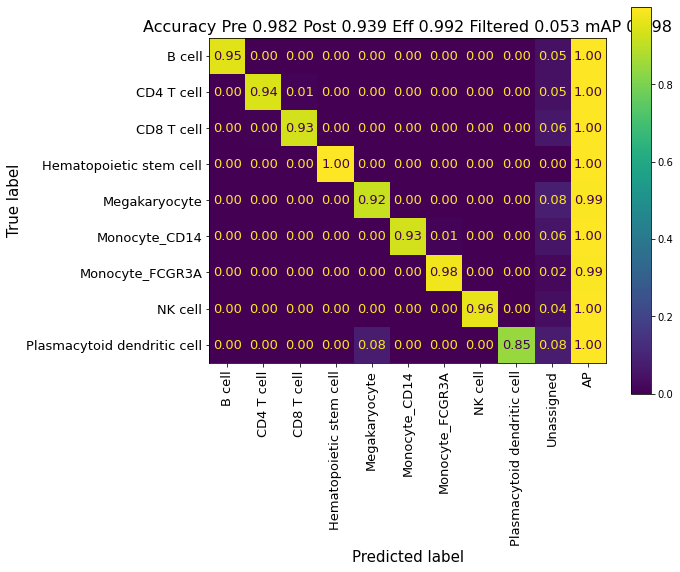

In [5]:
obj.dim_reduction(5000, 'Var')

train_config = {'val_frac': 0.2, 'seed': 0, 'batch_size': 128, 'cuda': False,
                'epochs': 15}

obj.train_classifier(config=train_config, cmat=True)

# Evaluating JIND Classifier

Test Acc Pre 0.9549 Post 0.8079 Eff 0.9876 Filtered 0.1819


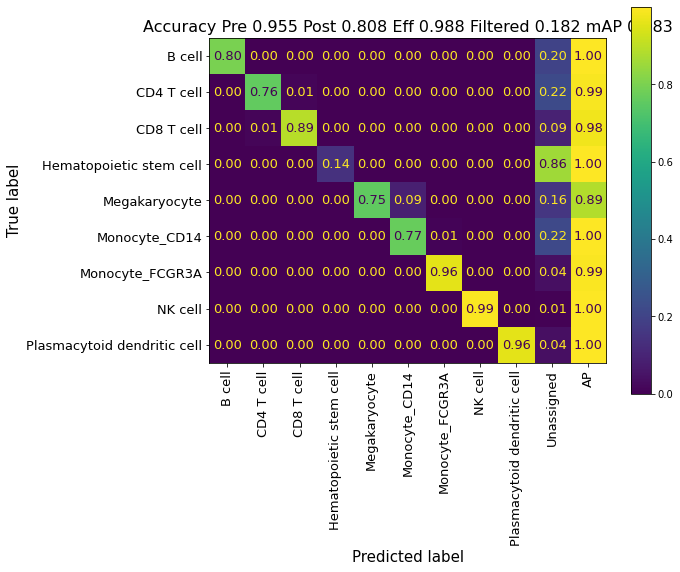

In [6]:
predicted_label1, log1 = obj.evaluate(test_mat, test_labels, frac=0.05, name="testcfmt.pdf", return_log=True)

In [7]:
# Save object for later use
obj.to_pickle("JindLib_obj.pkl")

# JIND Batch Alignment

In [8]:
obj.remove_effect(train_mat, test_mat, train_config, test_labels)

  0%|          | 0/58 [00:00<?, ?it/s]

Evaluating....
Test Acc Pre 0.9656 Post 0.9021 Eff 0.9851 Filtered 0.0842


  0%|          | 0/58 [00:00<?, ?it/s]

Evaluating....
Test Acc Pre 0.9676 Post 0.9088 Eff 0.9847 Filtered 0.0771


Epoch 2 G Loss: 0.717 D Loss: 0.682: 100%|██████████| 58/58 [00:05<00:00,  9.95it/s]


Evaluating....
Test Acc Pre 0.9703 Post 0.9133 Eff 0.9864 Filtered 0.0741


Test Acc Pre 0.9703 Post 0.9133 Eff 0.9864 Filtered 0.0741


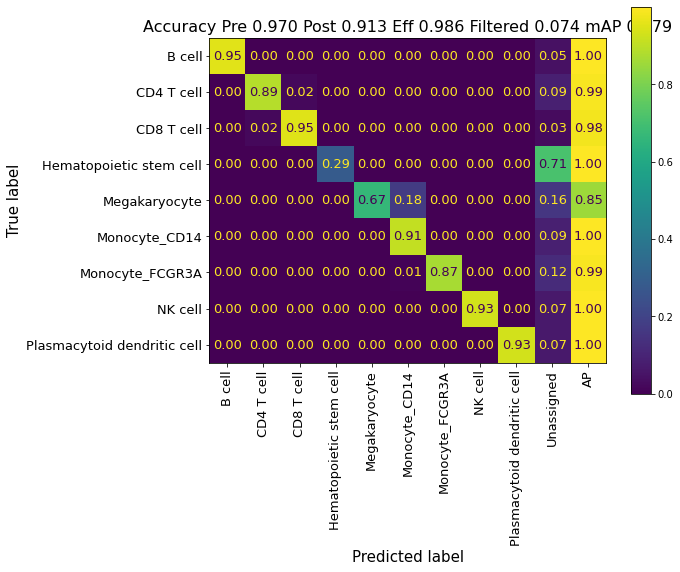

In [9]:
predicted_label2, log2  = obj.evaluate(test_mat, test_labels, frac=0.05, name="testcfmtbr.pdf", test=True, return_log=True)

# JIND+

Epoch 1 Train: 0.0:  10%|▉         | 12/126 [00:00<00:01, 111.80it/s]

Validation Accuracy 1.0000


Epoch 2 Train: 0.0:  10%|▉         | 12/126 [00:00<00:01, 111.99it/s]

Validation Accuracy 1.0000


Epoch 3 Train: 0.0:   8%|▊         | 10/126 [00:00<00:01, 95.59it/s]

Validation Accuracy 1.0000


Epoch 4 Train: 0.0:  10%|▉         | 12/126 [00:00<00:01, 110.28it/s]

Validation Accuracy 1.0000


Epoch 5 Train: 0.0:   7%|▋         | 9/126 [00:00<00:01, 88.61it/s]

Validation Accuracy 1.0000


Epoch 6 Train: 0.0:   7%|▋         | 9/126 [00:00<00:01, 89.16it/s]

Validation Accuracy 1.0000


Epoch 7 Train: 0.0:  10%|▉         | 12/126 [00:00<00:01, 113.89it/s]

Validation Accuracy 1.0000


Epoch 8 Train: 0.0:  10%|▉         | 12/126 [00:00<00:01, 110.53it/s]

Validation Accuracy 1.0000


Epoch 9 Train: 0.0:   9%|▊         | 11/126 [00:00<00:01, 105.55it/s]

Validation Accuracy 1.0000


Epoch 9 Train: 0.0: 100%|██████████| 126/126 [00:01<00:00, 105.99it/s]


Validation Accuracy 1.0000
Test Acc Pre 1.0000 Post 1.0000 Eff 1.0000 Filtered 0.0000


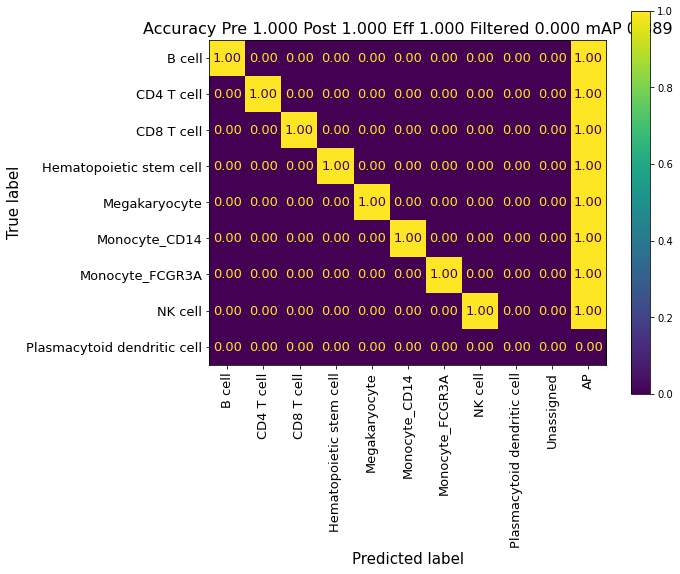

In [10]:
train_config = {'val_frac': 0.1, 'seed': 0, 'batch_size': 32, 'cuda': False,
				'epochs': 10}
obj.ftune(test_mat, train_config)

Test Acc Pre 0.9740 Post 0.9515 Eff 0.9847 Filtered 0.0337


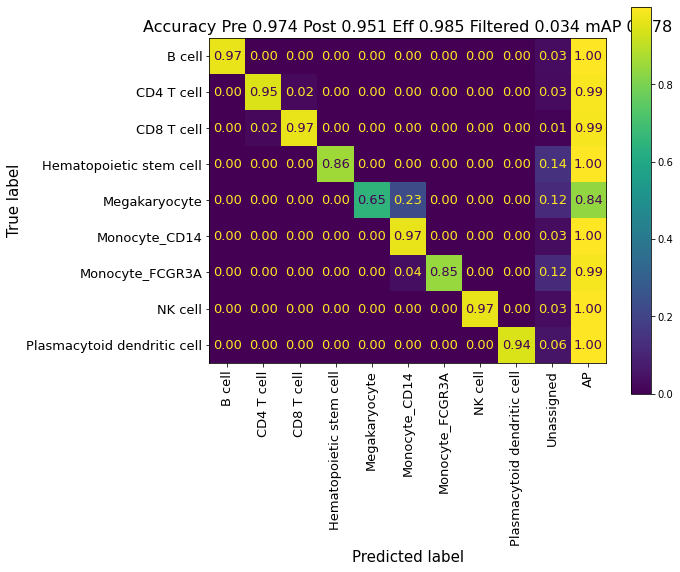

In [11]:
predicted_label3, log3  = obj.evaluate(test_mat, test_labels, frac=0.05, name="testcfmtbrftune.pdf", test=True, return_log=True)

# Visualizing Alignment in Latent Space

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 15476 samples in 0.133s...
[t-SNE] Computed neighbors for 15476 samples in 3.004s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15476
[t-SNE] Computed conditional probabilities for sample 2000 / 15476
[t-SNE] Computed conditional probabilities for sample 3000 / 15476
[t-SNE] Computed conditional probabilities for sample 4000 / 15476
[t-SNE] Computed conditional probabilities for sample 5000 / 15476
[t-SNE] Computed conditional probabilities for sample 6000 / 15476
[t-SNE] Computed conditional probabilities for sample 7000 / 15476
[t-SNE] Computed conditional probabilities for sample 8000 / 15476
[t-SNE] Computed conditional probabilities for sample 9000 / 15476
[t-SNE] Computed conditional probabilities for sample 10000 / 15476
[t-SNE] Computed conditional probabilities for sample 11000 / 15476
[t-SNE] Computed conditional probabilities for sample 12000 / 15476
[t-SNE] Computed conditional probabilities for sa

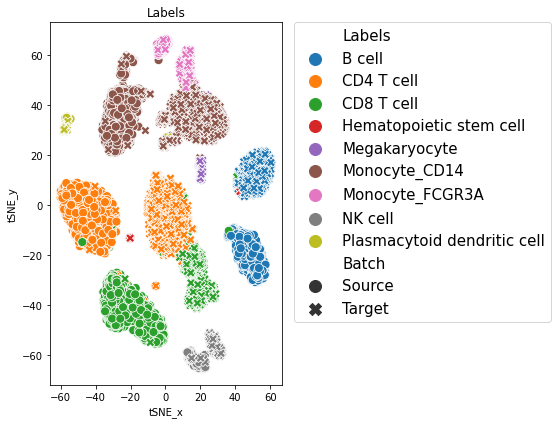

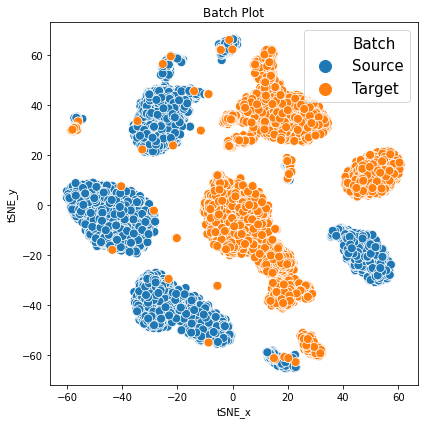

In [12]:
# Use the model before self training for comparing the latent state learnt by JIND Adversarial Alignment
obj.set_test_model("BR")

# Latent Space before Alignmnet
obj.vis_latent(train_mat, train_labels, test_mat, test_labels, test=False)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 15476 samples in 0.123s...
[t-SNE] Computed neighbors for 15476 samples in 4.801s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15476
[t-SNE] Computed conditional probabilities for sample 2000 / 15476
[t-SNE] Computed conditional probabilities for sample 3000 / 15476
[t-SNE] Computed conditional probabilities for sample 4000 / 15476
[t-SNE] Computed conditional probabilities for sample 5000 / 15476
[t-SNE] Computed conditional probabilities for sample 6000 / 15476
[t-SNE] Computed conditional probabilities for sample 7000 / 15476
[t-SNE] Computed conditional probabilities for sample 8000 / 15476
[t-SNE] Computed conditional probabilities for sample 9000 / 15476
[t-SNE] Computed conditional probabilities for sample 10000 / 15476
[t-SNE] Computed conditional probabilities for sample 11000 / 15476
[t-SNE] Computed conditional probabilities for sample 12000 / 15476
[t-SNE] Computed conditional probabilities for sa

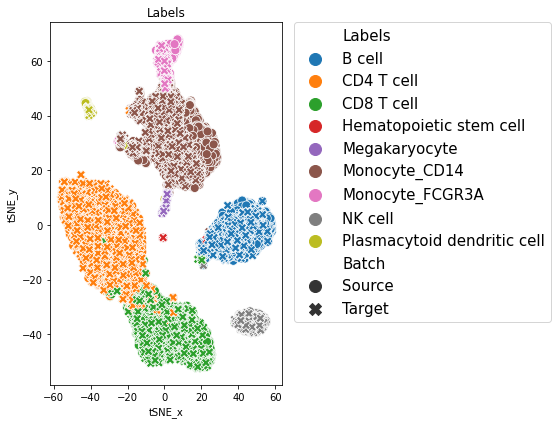

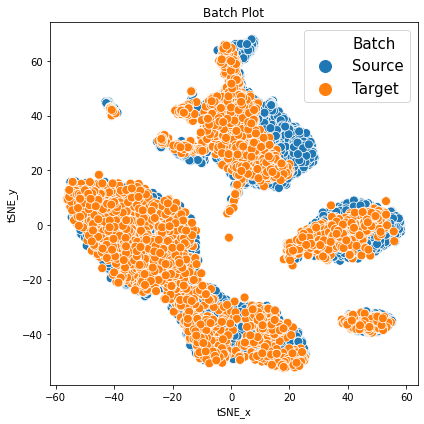

In [13]:
# Latent Space after Alignment
obj.vis_latent(train_mat, train_labels, test_mat, test_labels, test=True)